## Qual jogador você seria?

Sistema de pesquisa, onde após inserir o valor de seus atributos seria possível identificar o jogador mais parecido com você.

### 1º Passo - Importação

Importando as bibliotecas necessárias e o dataset. No caso vamos importar um dataset ja criado no nosso documento de apresentação.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('archive/male_players.csv',low_memory=False)

### 2º Passo - Preparação

A partir do dataset principal iremos criar um dataset com as informações relevantes para nossa pesquisa.

In [57]:
#Pegamos os atributos gerais mais significantes já que o dataset é muito extenso e possui muitas informações
players = data[["short_name","player_positions","movement_sprint_speed","defending_marking_awareness",
                          "dribbling","attacking_finishing","attacking_short_passing"]]

#Substituindo as colunas que haviam Nan pelo valor 
players_attributes = players.fillna(0)


In [58]:
players_attributes

,short_name,player_positions,movement_sprint_speed,defending_marking_awareness,dribbling,attacking_finishing,attacking_short_passing
0,K. Mbappé,"ST, LW",97,26,92.0,94,86
1,E. Haaland,ST,94,38,80.0,96,77
2,K. De Bruyne,"CM, CAM",72,66,87.0,85,94
3,L. Messi,"CF, CAM",74,20,94.0,89,91
4,K. Benzema,"CF, ST",79,43,87.0,91,89
...,...,...,...,...,...,...,...
180016,E. Redman,CB,66,38,30.0,25,36
180017,A. Collins,ST,68,25,35.0,47,25
180018,P. Żemło,"LM, LB",58,54,31.0,24,40
180019,T. Davies,CB,73,36,30.0,25,32


### 3º Passo - Criação da Função de Busca

Para realizar essa pesquisa usaremos o conceito de Similaridade por Cosseno, onde dado dois vetores é avaliado o valor do cosseno do ângulo compreendido entre eles.

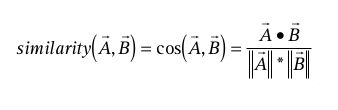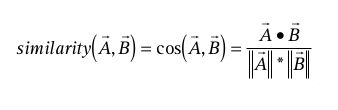

Nesse caso, teremos o vetor principal, onde as coordenadas serão os valores de atributos da pessoa que realizar a pesquisa, o qual será comparado com todos as coordenadas (atribiutos) dos jogadores do fifa.   

Inciar criando um array onde serão armazenados apenas os valores númericos dos jogadores, ou seja estarei criando um arry que irá conter as "coordenadas" dos jogadores

In [60]:
#Separando os atributos usados para a comparação
attributes = ['movement_sprint_speed', 'defending_marking_awareness', 'dribbling', 'attacking_finishing',"attacking_short_passing"]
compare_attributes = players_attributes[attributes].values


In [61]:
compare_attributes

array([[97., 26., 92., 94., 86.],
       [94., 38., 80., 96., 77.],
       [72., 66., 87., 85., 94.],
       ...,
       [58., 54., 31., 24., 40.],
       [73., 36., 30., 25., 32.],
       [41., 27., 45., 36., 43.]])

In [62]:
def search_player(player,array,dataset):
    
    #Fazendo o cálculo de similaridade por cosseno
    #np.dot calcula produto escalar, e  np.linalg.norm calcula a norma
    cos_similar = np.dot(array, player) / (np.linalg.norm(array, axis=1) * np.linalg.norm(player))

    #usando a função np.argmax que retorna o indice do maior valor
    most_similar = np.argmax(cos_similar)

    #Busca no dataset usando o index
    player_similar = dataset.loc[most_similar]

    return player_similar
    

In [66]:
search_player([97, 26, 92, 94, 86],compare_attributes,players_attributes)

short_name                     K. Mbappé
player_positions                  ST, LW
movement_sprint_speed                 97
defending_marking_awareness           26
dribbling                           92.0
attacking_finishing                   94
attacking_short_passing               86
Name: 0, dtype: object

In [77]:
#Em função de testar coloquei esses com a diferença de 1 dos dados E. Haaland	
search_player([93,37,79,95,76],compare_attributes,players_attributes)


short_name                     E. Haaland
player_positions                       ST
movement_sprint_speed                  94
defending_marking_awareness            38
dribbling                            80.0
attacking_finishing                    96
attacking_short_passing                77
Name: 1, dtype: object

In [76]:
search_player([41,27,45,36,46],compare_attributes,players_attributes)

short_name                     T. Reijnders
player_positions                         CM
movement_sprint_speed                    63
defending_marking_awareness              42
dribbling                              68.0
attacking_finishing                      55
attacking_short_passing                  70
Name: 125300, dtype: object

In [79]:
search_player([70,51,32,93,67],compare_attributes,players_attributes)

short_name                     P. Škuletić
player_positions                        ST
movement_sprint_speed                   65
defending_marking_awareness             45
dribbling                             55.0
attacking_finishing                     75
attacking_short_passing                 58
Name: 80452, dtype: object

In [80]:

 search_player([72., 66., 87., 85., 94.],compare_attributes,players_attributes)

short_name                     K. De Bruyne
player_positions                    CM, CAM
movement_sprint_speed                    72
defending_marking_awareness              66
dribbling                              87.0
attacking_finishing                      85
attacking_short_passing                  94
Name: 2, dtype: object